In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('evaluation.csv', header=None, names=['transaction_hash', 'num_events', 'time'])

In [9]:
# we can ignore the transactions with hundreds of events (col 2)
df = df[df["num_events"] < 100]

In [10]:
df_less_one_second = df[df["time"] < 1]
print(f"Number of rows with latency less than 1: {len(df_less_one_second)} ({len(df_less_one_second)/len(df)*100}%)")

df_more_one_second = df[df["time"] >= 1]
print(f"Number of rows with latency more than 1: {len(df_more_one_second)} ({len(df_more_one_second)/len(df)*100}%)")

max_latency = df["time"].max()
print(f"Max latency: {max_latency}")

Number of rows with latency less than 1: 56652 (95.44122106539977%)
Number of rows with latency more than 1: 2706 (4.558778934600222%)
Max latency: 8.777141094207764


In [11]:
# Load the file "transaction.facts" with 9 columns
df_transaction = pd.read_csv('../../../datalog/nomad-bridge/facts/transaction.facts', header=None, sep='\t', names=["timestamp", "chain_id", "transaction_hash", "transaction_index", "from", "to", "value", "status", "fee"], dtype={'col_6': str})
df_additional_transaction = pd.read_csv('../../../datalog/nomad-bridge/facts/additional_transaction.facts', header=None, sep='\t', names=["timestamp", "chain_id", "transaction_hash", "transaction_index", "from", "to", "value", "status", "fee"], dtype={'col_6': str})

# Append df_transaction and df_additional_transaction
df_transaction = pd.concat([df_transaction, df_additional_transaction], ignore_index=True)

df_transaction.to_csv('transaction.csv', index=False)

In [12]:
merged_df = df.merge(df_transaction[['transaction_hash', 'value']], how="left", on='transaction_hash')

merged_df.fillna(0, inplace=True)

In [13]:
merged_df['type'] = merged_df['value'].apply(lambda x: 'native' if int(x) > 0 else 'non-native')

merged_df.to_csv('output.csv', index=False)

In [14]:
df_native = merged_df[merged_df["type"] == "native"]
print(f"Number of rows with native token transfers: {len(df_native)} ({len(df_native)/len(merged_df)*100}%)")

df_non_native = merged_df[merged_df["type"] == "non-native"]
print(f"Number of rows with non-native token transfers: {len(df_non_native)} ({len(df_non_native)/len(merged_df)*100}%)")

Number of rows with native token transfers: 7656 (12.898008693015264%)
Number of rows with non-native token transfers: 51702 (87.10199130698474%)


In [23]:
datapoints = len(df_non_native)
print(f"Number of data points: {datapoints}")

# max latency of the non-native token transfers
max_latency_non_native = df_non_native["time"].max()
print(f"Max latency of the non-native token transfers: {max_latency_non_native}")

# min latency of the non-native token transfers
min_latency_non_native = df_non_native["time"].min()
print(f"Min latency of the non-native token transfers: {min_latency_non_native}")

# average latency of the non-native token transfers
average_latency_non_native = df_non_native["time"].mean()
print(f"Average latency of the non-native token transfers: {average_latency_non_native}")

# median latency of the non-native token transfers
average_latency_non_native = df_non_native["time"].median()
print(f"Median latency of the non-native token transfers: {average_latency_non_native}")

# standard deviation of the non-native token transfers
average_latency_non_native = df_non_native["time"].std()
print(f"Standard deviation of the non-native token transfers: {average_latency_non_native}")

Number of data points: 51702
Max latency of the non-native token transfers: 5.83479905128479
Min latency of the non-native token transfers: 3.814697265625e-06
Average latency of the non-native token transfers: 0.2567848861067628
Median latency of the non-native token transfers: 0.194872498512268
Standard deviation of the non-native token transfers: 0.2783600713501419


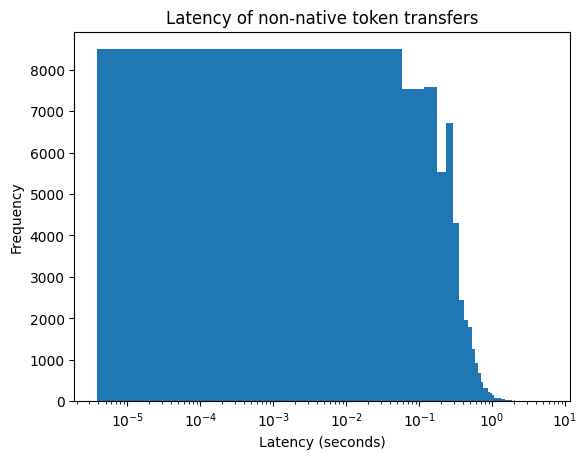

In [24]:
# plot the latency of the non-native token transfers
plt.hist(df_non_native["time"], bins=100)
plt.xlabel('Latency (seconds)')
plt.ylabel('Frequency')
#log scale in x
plt.xscale('log')
plt.title('Latency of non-native token transfers')
plt.show()

For the native tokens, we can estimate if they contained internal transactions or not

In [25]:
datapoints = len(df_native)
print(f"Number of data points: {datapoints}")

max_latency = df_native["time"].max()
print(f"Max latency of the transaction: {max_latency}")

min_latency = df_native["time"].min()
print(f"Min latency of the transaction: {min_latency}")

average_latency = df_native["time"].mean()
print(f"Average latency of the transaction: {average_latency}")

median_latency = df_native["time"].median()
print(f"Median latency of the transaction: {median_latency}")

std_latency = df_native["time"].std()
print(f"Standard deviation of the transaction: {std_latency}")

Number of data points: 7656
Max latency of the transaction: 8.777141094207764
Min latency of the transaction: 0.1591930389404297
Average latency of the transaction: 0.8901115618840779
Median latency of the transaction: 0.7759168148040771
Standard deviation of the transaction: 0.4618265400213075


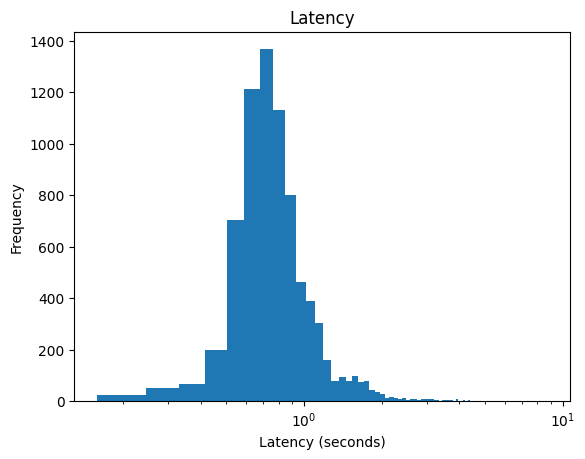

In [26]:
plt.hist(df_native["time"], bins=100)
plt.xlabel('Latency (seconds)')
plt.ylabel('Frequency')
plt.xscale('log')
plt.title('Latency')
plt.show()

In [27]:
# count how many of df_native have time > 1 and the percentage
df_native_time_gt_1 = df_native[df_native["time"] > 1]
print(f"Number of rows with latency greater than 1: {len(df_native_time_gt_1)} ({len(df_native_time_gt_1)/len(df_native)*100}%)")

# count how many of df_native have time > 10 and the percentage
df_native_time_gt_10 = df_native[df_native["time"] > 10]
print(f"Number of rows with latency greater than 10: {len(df_native_time_gt_10)} ({len(df_native_time_gt_10)/len(df_native)*100}%)")

# count how many of df_native have time > 10 and the percentage
df_native_time_gt_15 = df_native[df_native["time"] > 15]
print(f"Number of rows with latency greater than 15: {len(df_native_time_gt_15)} ({len(df_native_time_gt_15)/len(df_native)*100}%)")

Number of rows with latency greater than 1: 1725 (22.531347962382444%)
Number of rows with latency greater than 10: 0 (0.0%)
Number of rows with latency greater than 15: 0 (0.0%)
